In [ ]:
CHEXPERT_TRAIN = 'C:/Users/ignacio/workspace/stanford/cs230/CheXpert-v1.0-small/train.csv'
BASE_MASKS = 'C:/Users/ignacio/workspace/stanford/cs230/cs230-project/intermediate/out_lung_mask/'
BASE_IMG = 'C:/Users/ignacio/workspace/stanford/cs230/cs230-project/data/chexpert-cardio-nofinding/'
BASE_EXTRA = 'CheXpert-v1.0-small/train/'

In [107]:
#Find Min skipping 0
def find_min(arr):
    min_val = 1000
    for idx, value in enumerate(arr):
        if value < min_val and value != 0:
            min_val = value
    return min_val

def find_chest_width(path):
    img = cv2.imread(path)
    start = np.argmax(img[:,:,0],axis=1)
    end = np.argmax(img[:,::-1,0],axis=1)
    h,w,c = img.shape
    return find_min(start), w - find_min(end), w

def find_img(path):
    img = cv2.imread(path)
    return img.shape

In [ ]:
import pandas as pd

df = pd.read_csv(BASE_CHEXPERT)
df.head()

In [125]:
import pickle
import cv2


with open('../cs230-project/intermediate/out_heart.pickle', 'rb') as handle:
     out_heart = pickle.load(handle)
        
with open('../cs230-project/intermediate/out_paths.pickle', 'rb') as handle:
     out_paths = pickle.load(handle)

In [144]:
ctr_count_no = 0
ctr_amount_no = 0

ctr_count_un = 0
ctr_amount_un = 0

ctr_count = 0
ctr_amount = 0

ctr_healthy = []
ctr_uncertain = []
ctr_cardiomegaly = []
from tqdm import tqdm
for path, heart in tqdm(list(zip(out_paths,out_heart))):
    
    boxes = heart['boxes']
    x0,y0,x1,y1 = boxes[0].cpu().numpy()
    min_val,max_val,width = find_chest_width(BASE_MASKS + path)
    
    
    h,w,c = find_img(BASE_IMG + path)
    heart = (x1-x0)/w
    chest = (max_val-min_val)/width
    
    row = df[df.Path.eq(BASE_EXTRA + path.replace('_','/',2))]
   
    #print(row['Cardiomegaly'].values[0])
    #print(row['No Finding'].values[0])
    
    if row['No Finding'].values[0] == 1:
        ctr_count_no += 1
        ctr_amount_no += heart/chest
        ctr_healthy.append(heart/chest)
    elif row['Cardiomegaly'].values[0] == 1:
        ctr_count += 1
        ctr_amount += heart/chest
        ctr_cardiomegaly.append(heart/chest)
    else:
        ctr_count_un += 1
        ctr_amount_un += heart/chest
        ctr_uncertain.append(heart/chest)
    ctr =  heart/chest
    

100%|██████████████████████████████████████████████████████████████████████████████| 9547/9547 [02:16<00:00, 70.03it/s]


In [145]:
ctr_amount_no,ctr_count_no,ctr_amount_un,ctr_count_un,ctr_amount,ctr_count

(2829.7767699922097, 5499, 697.7203496657046, 1139, 1859.410622501327, 2909)

In [146]:
ctr_amount_no/ctr_count_no,ctr_amount_un/ctr_count_un,ctr_amount/ctr_count

(0.5145984306223331, 0.6125727389514527, 0.6391923762465889)

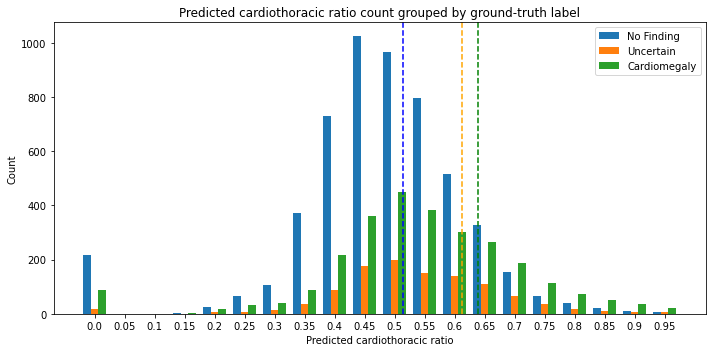

In [161]:
import matplotlib.pyplot as plt
import numpy as np

distributionA = np.random.normal(0.3, 0.1, 1000)
distributionB = np.random.normal(0.5, 0.1, 1000)
distributionC = np.random.normal(0.7, 0.1, 1000)

labels = np.array(range(20))/20
no_finding = np.histogram(ctr_healthy,bins=np.arange(21)/20)
uncertain = np.histogram(ctr_uncertain,bins=np.arange(21)/20)
cardiomegaly = np.histogram(ctr_cardiomegaly,bins=np.arange(21)/20)

x = np.arange(len(labels)) *2 # the label locations
width = 0.5# the width of the bars



fig, ax = plt.subplots(figsize=(10,5))

plt.axvline(x=np.average(ctr_healthy)*40, color='blue', linestyle='--')
plt.axvline(x=np.average(ctr_uncertain)*40, color='orange', linestyle='--')
plt.axvline(x=np.average(ctr_cardiomegaly)*40, color='green', linestyle='--')

rects1 = ax.bar(x - width, no_finding[0], width, label='No Finding')
rects2 = ax.bar(x, uncertain[0], width, label='Uncertain')
rects3 = ax.bar(x + width, cardiomegaly[0] , width, label='Cardiomegaly')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Predicted cardiothoracic ratio')
ax.set_title('Predicted cardiothoracic ratio count grouped by ground-truth label')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()


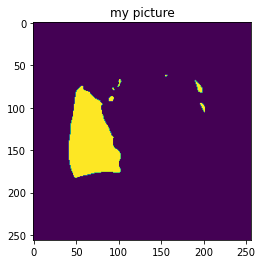

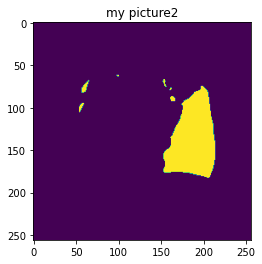

In [87]:
from matplotlib import pyplot as plt
import cv2

plt.imshow(img[:,:,0]*255)
plt.title('my picture')
plt.show()

plt.imshow(img[:,::-1,0]*255)
plt.title('my picture2')
plt.show()